In [1]:
library(Seurat)
library(tidyverse)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
xe = qs::qread('xenium_a1_processed')
xe

An object of class Seurat 
499 features across 18986 samples within 5 assays 
Active assay: SCT (99 features, 99 variable features)
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 2 spatial fields of view present: fov zoom

In [46]:
cell_stats = read_csv('/data/petar/fgf1/resolve/baysor_segmentation/32810-1377-slide3_A1-1_results_baysor_results/baysor_cell_stats.csv')
cell_stats %>% head

Rows: 18986 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cell
dbl (7): x, y, n_transcripts, density, elongation, area, avg_confidence

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cell,x,y,n_transcripts,density,elongation,area,avg_confidence
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cell1_4012_26,4011.529,26.44203,138,0.04986,1.381,2768,0.9854
Cell2_4020_72,4020.296,71.72959,196,0.05998,1.831,3268,0.9927
Cell3_3895_189,3894.667,189.22222,117,0.04684,4.285,2498,0.9858
Cell4_3880_239,3879.782,239.14523,482,0.07543,1.157,6390,0.9974
Cell5_4017_126,4016.688,125.86458,192,0.06028,1.188,3185,0.9919
Cell6_3803_344,3803.318,344.18750,176,0.05479,1.858,3212,0.9909


In [ ]:
  geom_violin(fill = "lightblue", alpha = 0.5) +
  geom_boxplot(width = 0.1, fill = "white", color = "black") +
  theme_classic() +
  labs(x = "", y = "Area")

In [22]:
probeset = xe@assays$Xenium@meta.features %>% rownames

In [3]:
fgf1 = qs::qread('../obob_Day5_obj_sct.qs')
fgf1

An object of class Seurat 
58613 features across 58235 samples within 3 assays 
Active assay: SCT (26292 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [4]:
obj_list = list(xe = xe,
                fgf1 = fgf1)

In [5]:
for (i in 1:length(obj_list)) {
    obj_list[[i]] <- NormalizeData(obj_list[[i]], verbose = FALSE)
    obj_list[[i]] <- FindVariableFeatures(obj_list[[i]], selection.method = "vst", nfeatures = 2000,
        verbose = FALSE)
}

In [6]:
ref.list = list(fgf1 = fgf1)
anchors = FindIntegrationAnchors(object.list = obj_list, dims = 1:30)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 43702 anchors

Warning message:
“Requested number is larger than the number of available items (98). Setting to 98.”
Warning message:
“Requested number is larger than the number of available items (98). Setting to 98.”
Warning message:
“Requested number is larger than the number of available items (98). Setting to 98.”
Warning message:
“Requested number is larger than the number of available items (98). Setting to 98.”
Warning message:
“Requested number is larger than the number of available items (98). Setting to 98.”
Warning message:
“Requested number is larger than the number of available items (98). Setting to 98.”
Warning message:
“Requested number is larger than the number of available items (98). Setting to 98.”
Warning message:
“Requested number is larger than the number of available items (98). Se

In [7]:
qs::qsave(anchors, "standard_integration_anchors")

In [8]:
combined <- IntegrateData(anchorset = anchors)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [9]:
qs::qsave(combined, "fgf1_spatial_integrated")

In [10]:
combined

An object of class Seurat 
55678 features across 77221 samples within 7 assays 
Active assay: integrated (98 features, 98 variable features)
 6 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe, SCT, RNA
 2 spatial fields of view present: fov zoom

In [14]:
DefaultAssay(combined) <- "integrated"

# Run the standard workflow for visualization and clustering
combined <- ScaleData(combined, verbose = FALSE)
combined <- RunPCA(combined, npcs = 30, verbose = FALSE)
combined <- RunUMAP(combined, reduction = "pca", dims = 1:30)
combined <- FindNeighbors(combined, reduction = "pca", dims = 1:30)
combined <- FindClusters(combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:46:25 UMAP embedding parameters a = 0.9922 b = 1.112

18:46:25 Read 77221 rows and found 30 numeric columns

18:46:25 Using Annoy for neighbor search, n_neighbors = 30

18:46:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:46:42 Writing NN index file to temp file /scratch/nmq407/R_tmp//RtmpjgBkIS/filebb22d95ed00

18:46:42 Searching Annoy index using 1 thread, search_k = 3000

18:47:18 Annoy recall = 99.98%

18:47:22 Commencing smooth kNN distance calibration using 1 thread
 with 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 77221
Number of edges: 2818480

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9593
Number of communities: 90
Elapsed time: 24 seconds


50 singletons identified. 40 final clusters.



In [15]:
2

[1] 2

In [16]:
qs::qsave(combined, "fgf1_spatial_integrated_processed")

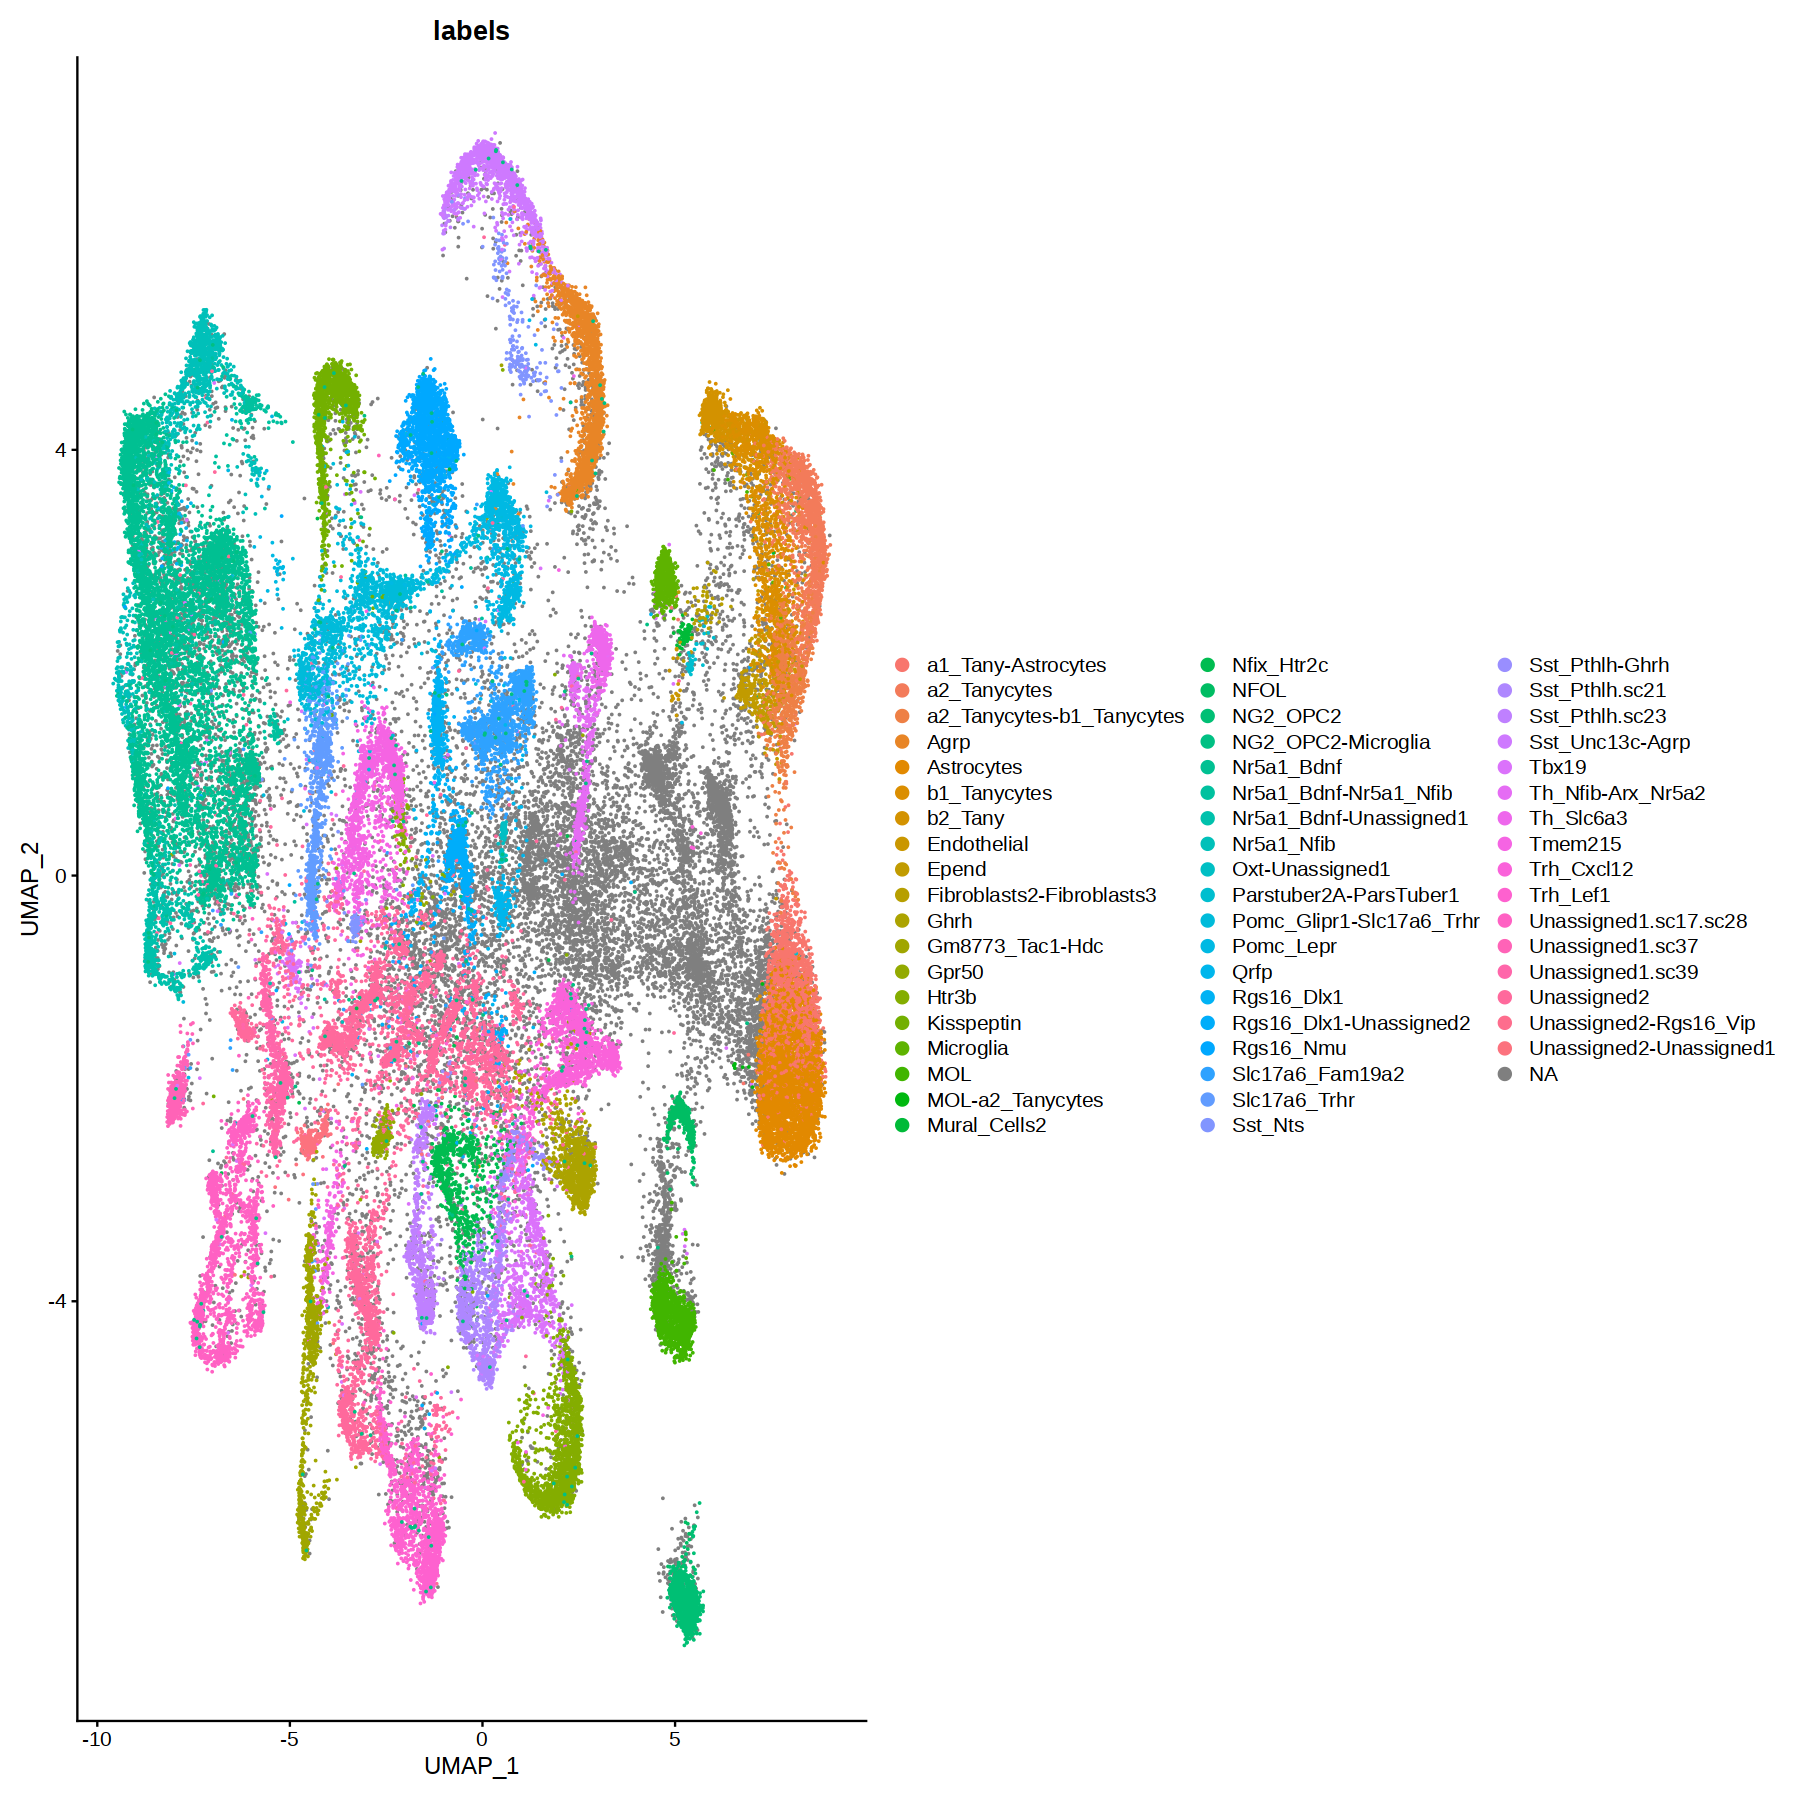

In [21]:
options(repr.plot.width=15, repr.plot.height=15)
DimPlot(combined, reduction = "umap", group.by = "labels", repel = TRUE)


In [ ]:
transfer_anchors <- FindTransferAnchors(reference = pancreas.integrated, query = pancreas.query,
    dims = 1:30, reference.reduction = "pca")

In [ ]:
predictions <- TransferData(anchorset = anchors, refdata = pancreas.integrated$celltype,
    dims = 1:30)predictions <- TransferData(anchorset = pancreas.anchors, refdata = pancreas.integrated$celltype,
    dims = 1:30)

In [26]:
qs::qread('../01_milo//clusters_tibble.qs') %>%
mutate(class = str_replace(object, 'exp_labelled_', '')) %>%
select(cluster, class) %>%
distinct(cluster, class)

cluster,class
<chr>,<chr>
Astrocytes,other
a1_Tany__Astrocytes,other
MOL,other
a2_Tanycytes,other
NG2_OPC2,other
a2_Tanycytes__b1_Tanycytes,other
b1_Tanycytes,other
b2_Tany,other
Microglia,other


In [42]:
xe@images$fov@boundaries$segmentation@polygons %>% head

$Cell10000_9129_13312
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1]  9128.541 13312.979

Slot "area":
[1] 1271

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
      x     y
1  9127 13283
2  9119 13285
3  9112 13303
4  9126 13341
5  9129 13348
6  9135 13345
7  9141 13335
8  9142 13320
9  9142 13316
10 9137 13294
11 9133 13285
12 9127 13283



Slot "plotOrder":
[1] 1

Slot "labpt":
[1]  9128.541 13312.979

Slot "ID":
[1] "Cell10000_9129_13312"

Slot "area":
[1] 1271


$Cell10001_7423_16733
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1]  7420.991 16733.173

Slot "area":
[1] 467

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
      x     y
13 7418 16723
14 7412 16724
15 7406 16726
16 7405 16738
17 7436 16743
18 7440 16739
19 7434 16732
20 7425 16724
21 7418 16723



Slot "plotOrder":
[1] 1

Slot "labpt":
[1]  7420.991 16733.173

Slot "ID":
[1] "Cell10001_

In [43]:
read_table("cells.tsv.gz") %>% head


── Column specification ────────────────────────────────────────────────────────
cols(
  `0` = col_character()
)



0
<chr>
Cell10000_9129_13312
Cell10001_7423_16733
Cell10002_2432_2392
Cell10003_8358_77
Cell10004_9190_600
Cell10005_10135_15550


In [45]:
read_csv("cell_boundaries.csv.gz") %>% head

Rows: 200904 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cell_id
dbl (2): vertex_x, vertex_y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cell_id,vertex_x,vertex_y
<chr>,<dbl>,<dbl>
Cell10000_9129_13312,9127,13283
Cell10000_9129_13312,9119,13285
Cell10000_9129_13312,9112,13303
Cell10000_9129_13312,9126,13341
Cell10000_9129_13312,9129,13348
Cell10000_9129_13312,9135,13345
